<a href="https://colab.research.google.com/github/ShriramDayama/insurance_premium/blob/main/insurance_premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [60]:
data = pd.read_csv('https://github.com/ShriramDayama/insurance_premium/raw/main/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [61]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [62]:
sex = pd.get_dummies(data.sex , drop_first= True)
sex.head()

,male
0,0
1,1
2,1
3,1
4,1


In [63]:
smoker = pd.get_dummies(data.smoker , drop_first= True)
smoker.rename(columns = {'yes' : 'smoker'}, inplace = True)
smoker.head()

,smoker
0,1
1,0
2,0
3,0
4,0


In [64]:
region = pd.get_dummies(data.region , drop_first= True)
region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [65]:
new_data = data.drop(['sex', 'smoker', 'region'], axis = 1)
new_data.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [66]:
final_data = pd.concat([new_data,sex, smoker,region ], axis = 1)
final_data.head()

,age,bmi,children,expenses,male,smoker,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [68]:
X_train, X_test , y_train, y_test = train_test_split(final_data.drop(['expenses'], axis = 1), final_data.expenses, test_size = 0.2)

In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

0.7598807277904353

In [70]:
ylr = lr.predict(X_test)

In [71]:
xgr = XGBRegressor()
xgr.fit(X_train,y_train)
xgr.score(X_test,y_test)

[08:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8542062340593355

In [72]:
yxg = xgr.predict(X_test)

In [73]:
import seaborn as sn

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


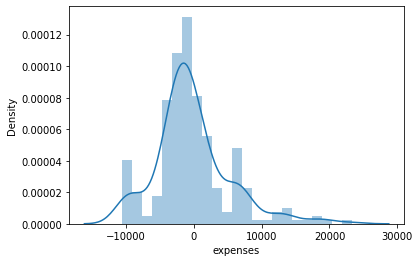

In [74]:
sn.distplot(y_test-ylr)

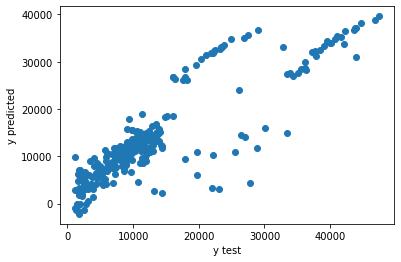

In [77]:
plt.scatter(y_test,  ylr)
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


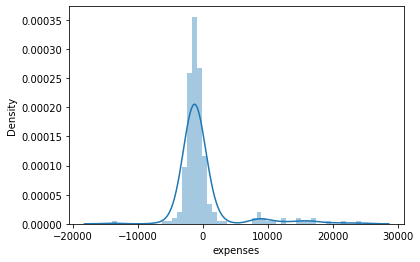

In [76]:
sn.distplot(y_test - yxg)

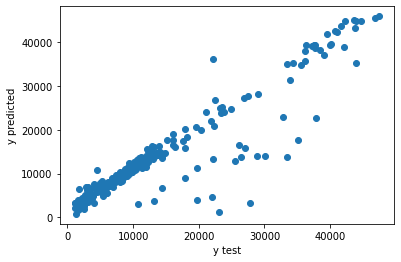

In [79]:
plt.scatter(y_test,  yxg)
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.show()